In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import math

In [2]:
data = pd.read_csv('online.csv')
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
X = data.drop(labels=['isFlaggedFraud','isFraud','nameOrig','nameDest'],axis=1)
y = data['isFraud']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = True)

In [12]:
j=0
for i in range(1,4):
    X_train2=PolynomialFeatures(i).fit_transform(X_train)
    X_test2=PolynomialFeatures(i).fit_transform(X_test)
    X_val2=PolynomialFeatures(i).fit_transform(X_val)
    model=LogisticRegression()
    model.fit(X_train2,y_train)
    predicted=model.predict(X_val2)
    mse=mean_squared_error(y_val, predicted)
    rmse=math.sqrt(mse)
    if i==1:
        LeastError=rmse
    if rmse<LeastError:
        j=i
        LeastError=rmse
    print(rmse)

0.04070074064475826


C:\Users\Mostafa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.03547012140781345


C:\Users\Mostafa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.03547012140781345


In [13]:
print(j)

2


C:\Users\Mostafa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Predicted')

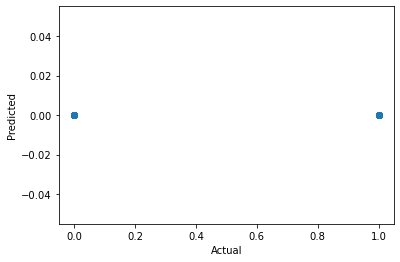

In [14]:
X_train3=PolynomialFeatures(j).fit_transform(X_train)
X_test3=PolynomialFeatures(j).fit_transform(X_test)
X_val3=PolynomialFeatures(j).fit_transform(X_val)
model=LogisticRegression()
model.fit(X_train3,y_train)
predicted=model.predict(X_test3)
plt.scatter(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')